# Bank Marketing Project 

dataset source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
train_df = pd.read_csv('bank_marketing_train.csv', sep=';')
test_df = pd.read_csv('bank_marketing_test.csv', sep=';')

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [36]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


The train file holds 90% of the data and the test file holds the other 10% (they both include the target column, "y"). I think that ratio is a little too high and an 80/20 split would allow for a more thorough test set. Subsequently, I'm going to concatenate these two files and then perform a new train-test split.

In [37]:
rejoined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
rejoined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Tidying up the datetime columns and performing the train-test-split

Before doing a train-test-split, I'd like to be able to see how the date columns work throughout the year. To that end, I'll convert them to a 'month-day' datetime column, which I can do here before the train-test-split without producing any data leakage.

In [38]:
#Making sure the 'month' column is exhaustive 
rejoined_df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [39]:
#converting the 'month' column to a datetime-conversion-friendly format
month_abbr_to_num = {
    "jan": '01',
    "feb": '02',
    "mar": '03',
    "apr": '04',
    "may": '05',
    "jun": '06',
    "jul": '07',
    "aug": '08',
    "sep": '09',
    "oct": '10',
    "nov": '11',
    "dec": '12',
}
rejoined_df['month'] = rejoined_df['month'].map(month_abbr_to_num)
rejoined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,05,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,05,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,05,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,05,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,05,198,1,-1,0,unknown,no


In [40]:
#First converting the 'day' column to a string column
rejoined_df['str_day'] = rejoined_df['day'].apply(str)

In [41]:
#Now adding in the leading zeroes before converting to datetime
# since Python wouldn't allow it when they were integers
leading_zeroes_dict = {
    '1': '01',
    '2': '02',
    '3': '03',
    '4': '04',
    '5': '05',
    '6': '06',
    '7': '07',
    '8': '08',
    '9': '09',
}
rejoined_df['str_day'] = rejoined_df['str_day'].map(leading_zeroes_dict).fillna(rejoined_df['str_day'])
#Making sure it worked
rejoined_df['str_day'].unique()

array(['05', '06', '07', '08', '09', '12', '13', '14', '15', '16', '19',
       '20', '21', '23', '26', '27', '28', '29', '30', '02', '03', '04',
       '11', '17', '18', '24', '25', '01', '10', '22', '31'], dtype=object)

In [42]:
#creating a 'month-day' column that will better help keep track of annual trends
rejoined_df['month-day'] = rejoined_df['month'] + rejoined_df['str_day']
rejoined_df['month-day'] = pd.to_datetime(rejoined_df['month-day'], format='%m%d')
rejoined_df['month-day'] = rejoined_df['month-day'].dt.strftime('%m%d')

#dropping the now-unnecessary 'str_day' column
rejoined_df.drop('str_day', axis=1, inplace=True)

#converting the original 'month' and 'day' columns back into integers:
rejoined_df['month'] = rejoined_df['month'].apply(int)
rejoined_df['day'] = rejoined_df['day'].apply(int)

rejoined_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month-day
28879,47,unemployed,divorced,secondary,no,0,no,yes,cellular,30,1,127,2,233,8,other,no,0130
17525,53,unemployed,married,primary,no,845,no,no,cellular,29,7,123,2,-1,0,unknown,no,0729
35132,37,admin.,single,secondary,no,22,yes,no,cellular,7,5,28,2,289,5,failure,no,0507
36148,39,technician,single,secondary,no,283,yes,no,cellular,11,5,369,2,350,1,failure,no,0511
14839,37,blue-collar,married,secondary,no,0,no,no,cellular,16,7,1150,1,-1,0,unknown,no,0716
22870,31,entrepreneur,single,tertiary,no,95,no,no,cellular,25,8,51,5,-1,0,unknown,no,0825
22208,50,management,married,tertiary,no,0,no,no,cellular,21,8,89,2,-1,0,unknown,no,0821
26881,32,technician,single,tertiary,no,502,yes,no,telephone,20,11,442,4,-1,0,unknown,no,1120
42443,38,entrepreneur,divorced,secondary,no,1190,yes,no,cellular,7,12,347,4,186,5,success,no,1207
40428,56,admin.,married,primary,no,3562,no,no,cellular,2,7,229,1,-1,0,unknown,no,0702


One last change I can make without data leakage would be to turn the target column ("y") values into 0's and 1's (for "no" and "yes", respectively). 

In [43]:
rejoined_df.replace({'no': 0, 'yes': 1}, inplace=True)
rejoined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month-day
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,0505
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,0505
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,0505
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,0505
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,0505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,0,-333,1,0,cellular,30,7,329,5,-1,0,unknown,0,0730
49728,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,5,153,1,-1,0,unknown,0,0509
49729,57,technician,married,secondary,0,295,0,0,cellular,19,8,151,11,-1,0,unknown,0,0819
49730,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,2,129,4,211,3,other,0,0206


Let's try to keep the categorical column one-hot encoding minimal and transform the education column to numbers since it lends itself well to numerical categories anyway:

In [44]:
education_dict = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
rejoined_df['education'] = rejoined_df['education'].map(education_dict)
rejoined_df['education'].value_counts()

2    25508
3    14651
1     7529
0     2044
Name: education, dtype: int64

In [45]:
#Now to train-test-split with a larger test size than the original dataset files had
X = rejoined_df.drop('y', axis=1)
y = rejoined_df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=713)

In [46]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,month-day
22065,51,housemaid,married,1,0,3486,0,0,cellular,20,8,135,11,-1,0,unknown,0820
23946,54,blue-collar,married,2,0,466,0,0,cellular,29,8,436,4,-1,0,unknown,0829
14232,35,blue-collar,married,2,0,1287,1,0,cellular,14,7,330,2,-1,0,unknown,0714
15211,50,blue-collar,married,2,0,19,0,0,cellular,17,7,209,4,-1,0,unknown,0717
24198,34,technician,single,2,0,105,1,0,cellular,17,11,303,1,196,2,failure,1117


## Understanding each feature

Some columns are self-explanatory, such as 'age', 'job', 'marital' status, 'education' level, best way to 'contact', and the target ('y'). Others are not as straightforward, so let's consult the data dictionary [found with the dataset here](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data):

**basic client information:**
- 'default' shows whether they've defaulted on credit before
- 'balance' refers to the average yearly account balance
- 'housing' (yes/no) shows whether they have a housing loan
- 'loan' (yes/no) shows whether they have a personal loan

**current marketing campaign data:**
- 'day', 'month', and 'duration' refer to the last time the bank contacted the client via phone in terms of the day of the month, the month, and the duration of that last call in seconds. 
- 'campaign' refers to the 'number of contacts performed during this campaign and for this client' and this 'includes the last contact'

**previous campaign data:**
- 'pdays' refers to the 'number of days that passed by after the client was last contacted from a previous campaign' and '-1 means client was not previously contacted'
- 'previous' refers to the 'number of contacts performed before this campaign and for this client'
- 'poutcome' refers to the 'outcome of the previous marketing campaign'

### Let's also examine how these columns' values are distributed. First, the continuous features:

In [47]:
X_train_continuous = X_train[['age', 'balance', 'campaign', 'pdays', 'previous']]

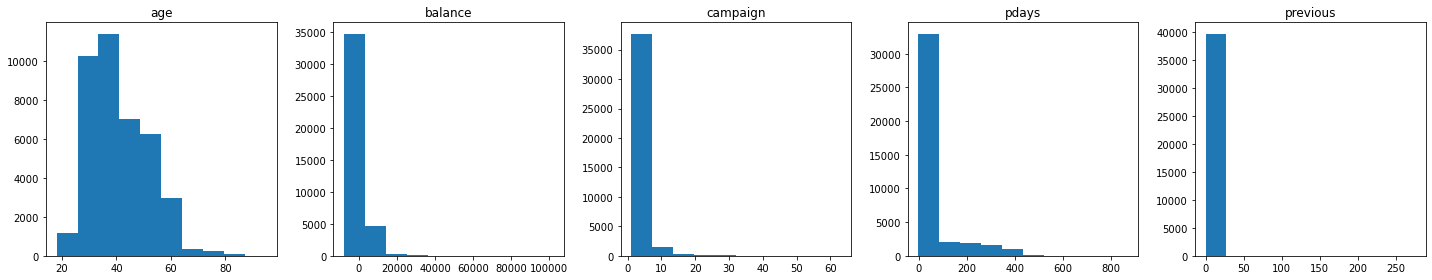

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))
for index, col in enumerate(X_train_continuous):
    axes[index].hist(X_train_continuous[col])
    axes[index].set_title(X_train_continuous.columns[index])
plt.tight_layout();

Each of these distributions skew left. It turns out that [continuous features do not need to be normally distributed in a decision tree classification problem](https://www.sciencedirect.com/topics/nursing-and-health-professions/logistic-regression-analysis#:~:text=Logistic%20regression%20does%20not%20assume,equal%20variance%20within%20each%20group), but I should normalize them for the StatsModels and Scikit-Learn Logit models. 

Also, it's worth noting that all these attributes except for 'age' start on zero and all of them contain a few high outliers. 

Before I examine the categorical columns, the date information is kind of in a grey area. Let's check out how the months look:

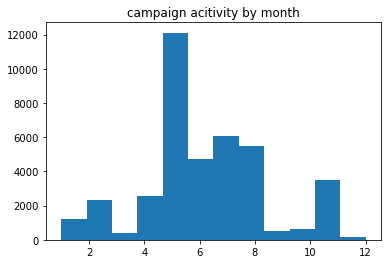

In [49]:
fig, ax = plt.subplots()
ax.hist(X_train['month'], bins=12)
ax.set_title('campaign acitivity by month');

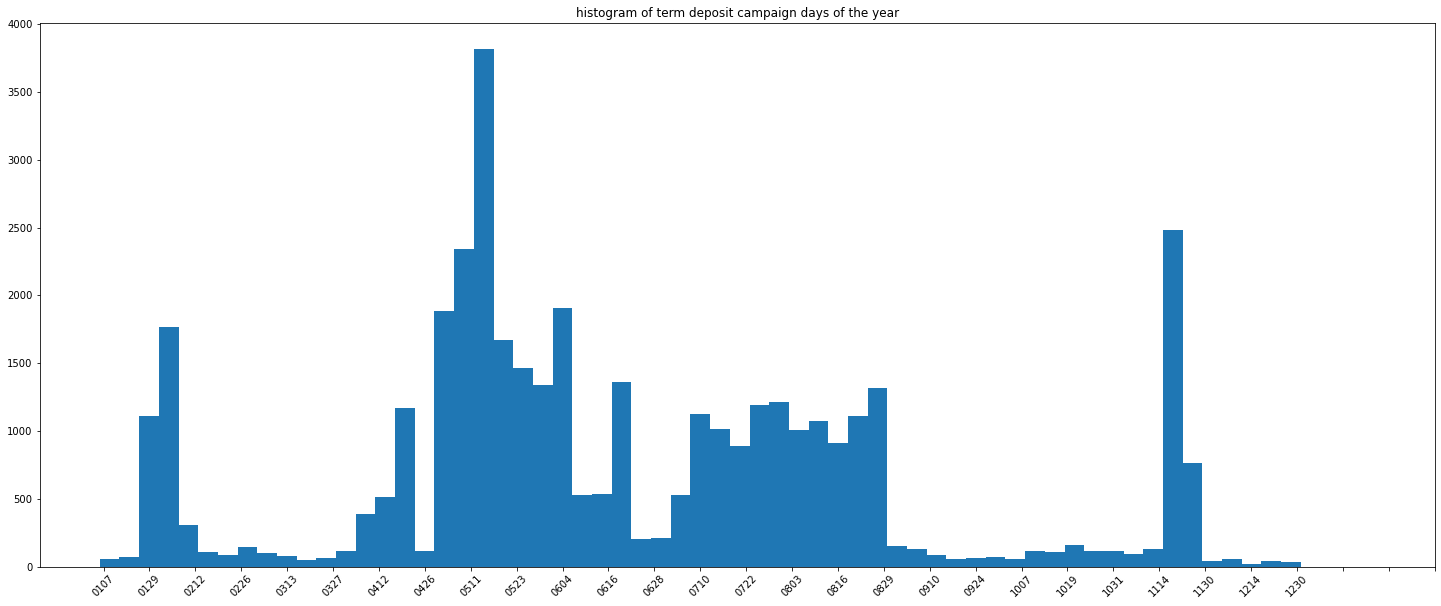

In [50]:
#Have to do a little legwork to resort the 'month-day' column for a histogram
X_train_month_day_sorted = X_train['month-day'].copy()
X_train_month_day_sorted.sort_values(inplace=True)
#Plotting the histogram
x_ticks_range = np.arange(1, 360, 12)
fig, ax = plt.subplots(figsize=(25,10))
ax.hist(X_train_month_day_sorted, bins='auto')
ax.set_title('histogram of term deposit campaign days of the year')
plt.xticks(x_ticks_range, rotation=45);

This is just the months/days of the year for the records in our dataset; not the successful conversion attempt days. Nonetheless, we can see they were a lot more active during the summer with a few spikes along the way in late-January/early-February, April, and then a pretty big one during November.

### Now let's see how the other categorical columns look. 

This graph may be a little hard to read in detail, but for now, I'm just looking to see the general distribution of each column, not the details.

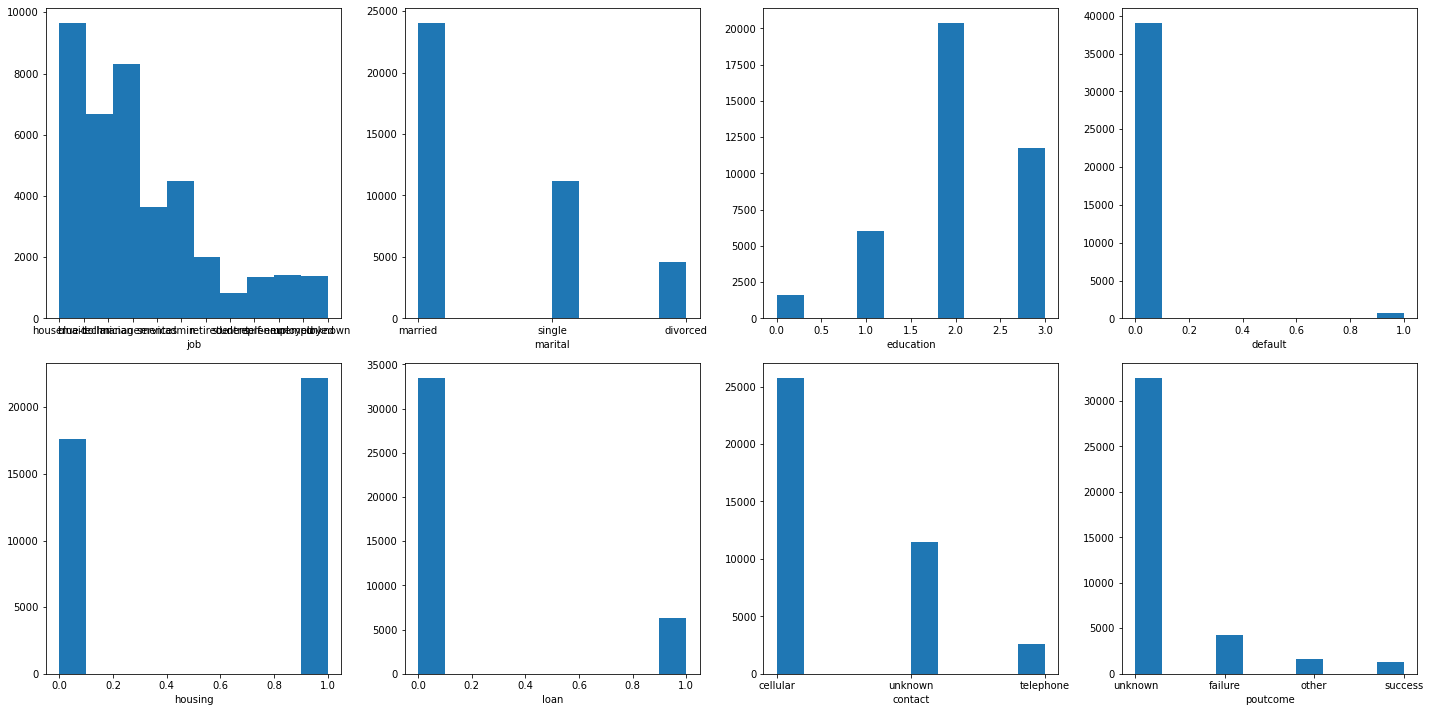

In [51]:
X_train_categorical = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i, column in enumerate(X_train_categorical.columns):
    row = i//4
    col = i%4
    ax = axes[row][col]
#    ax.hist(column, density=True)
#    ax.hist(column, bins='auto')
    ax.hist(X_train[column])
    ax.set_xlabel(column)
plt.tight_layout();

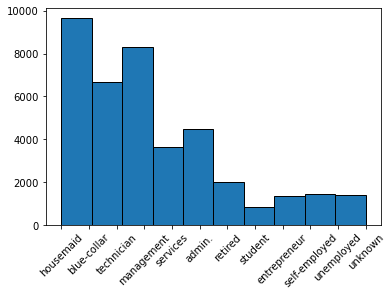

In [52]:
#The first one ('job') is hard to see, here it is on its own.
plt.hist(X_train['job'], edgecolor='black')
plt.xticks(rotation=45);

So, when it comes to issue of entropy, it looks like the 'default' and 'loan' columns would make the best case for earlier splits in a decision tree, with 'poutcome' next, then probably 'marital', 'contact', and 'education' won't be too far behind, then 'job' and 'housing' round out the end of the line. Of course, we won't know until we run a decision tree model. 

## preprocessing training data

Okay, before we start modelling, let's preprocess X_train by one-hot encoding the categorical features:

In [53]:
from sklearn.preprocessing import OneHotEncoder
#one-hot encoding the categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
#X_train_categorical_ohe = X_train_categorical
#codes = ohe.fit_transform(X_train_categorical_ohe)
columns_to_ohe = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
encoded = ohe.fit_transform(X_train[columns_to_ohe])
encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [54]:
X_train_categorical_ohe = pd.DataFrame(encoded,
                                      columns=ohe.get_feature_names_out(),
                                      index=X_train.index)
X_train_preprocessed = pd.concat([X_train, X_train_categorical_ohe], axis=1).drop(columns_to_ohe, axis=1)
X_train_preprocessed

,age,balance,day,month,duration,campaign,pdays,previous,month-day,job_blue-collar,...,education_2,education_3,default_1,housing_1,loan_1,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
22065,51,3486,20,8,135,11,-1,0,0820,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23946,54,466,29,8,436,4,-1,0,0829,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14232,35,1287,14,7,330,2,-1,0,0714,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15211,50,19,17,7,209,4,-1,0,0717,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24198,34,105,17,11,303,1,196,2,1117,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47464,30,1924,6,2,170,1,-1,0,0206,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2114,54,-337,12,5,288,2,-1,0,0512,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
46755,35,1100,29,1,127,2,-1,0,0129,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18813,50,1138,31,7,73,8,-1,0,0731,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## building a decision tree model

I think a decision tree is the best way to go right now and then, if we want to "exceed objectives" later, we can try a scikit-learn or StatsModels classification model later. But ultimately, I don't how else I'd find out which attributes correlate best outside of a decision tree. 

I know decision trees are all about how you set them up, pruning, and hyperparameters. To that end, maybe our "baseline" here is a "vanilla" model where we don't do any of that stuff first.

In [55]:
#Importing everything we'll need for our baseline model
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [56]:
#instantiating & fitting the DecisionTreeClassifier model
clf_baseline = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_baseline.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=713)

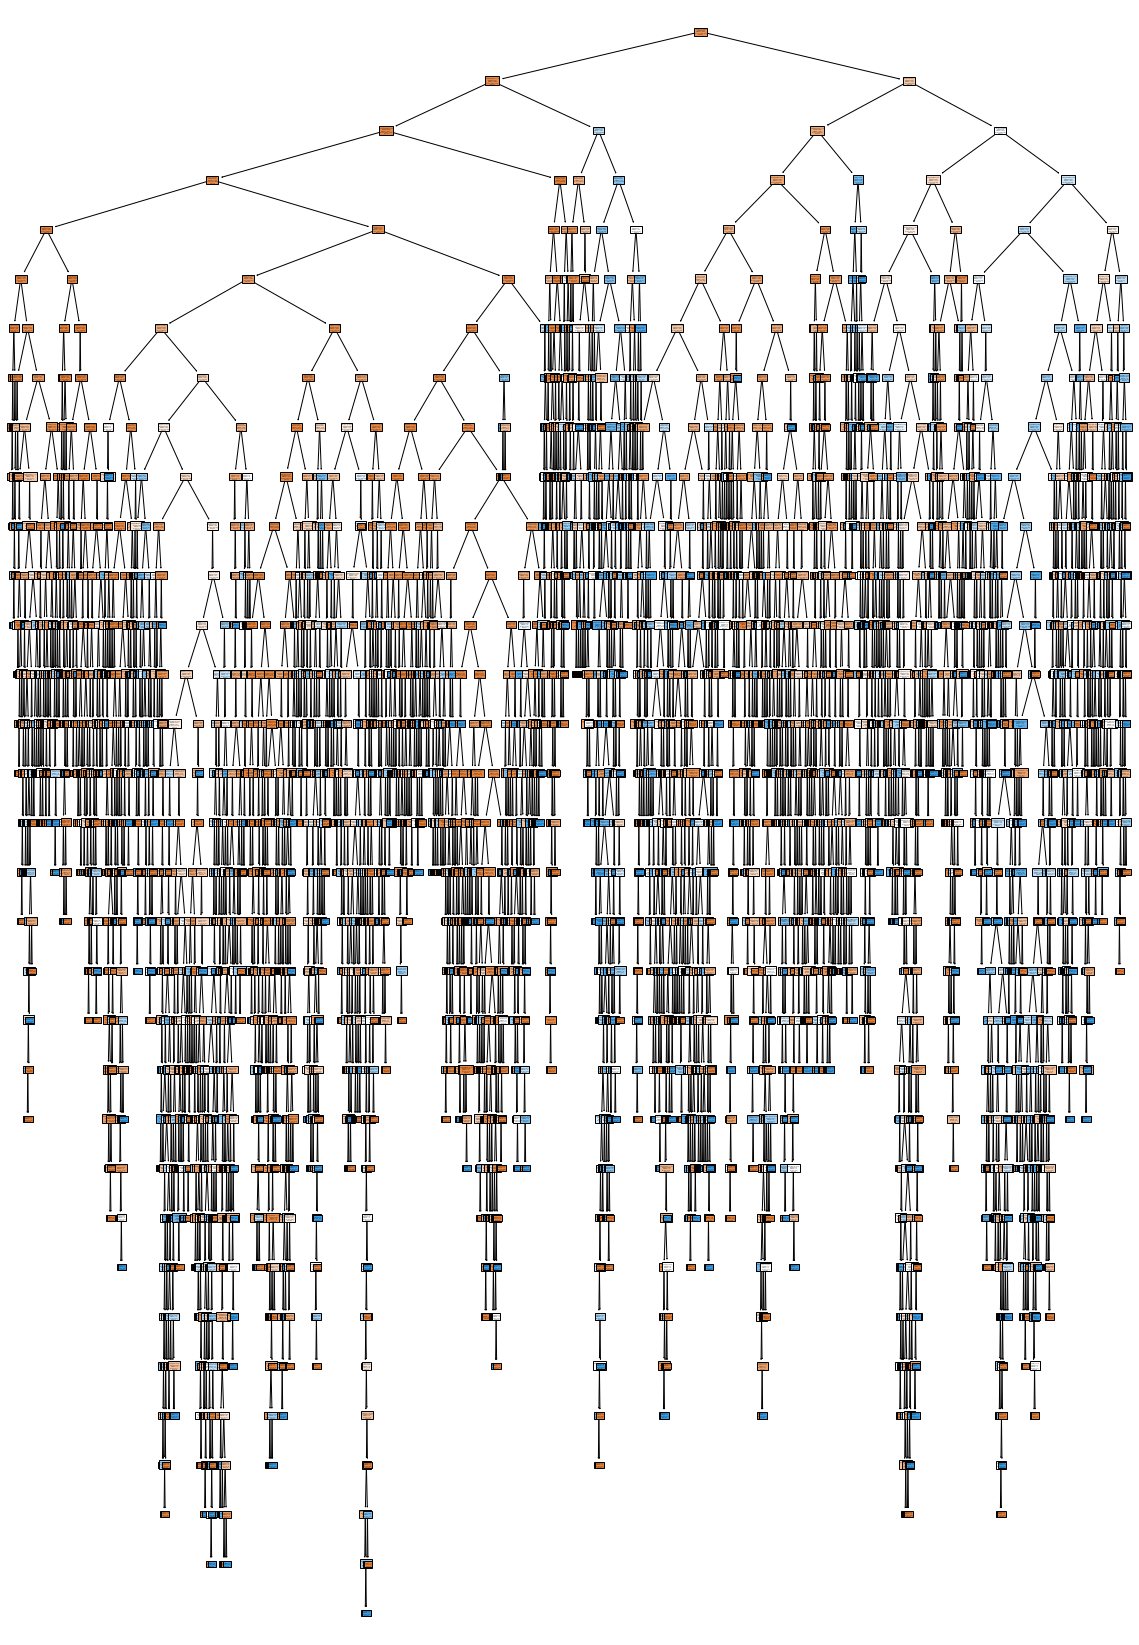

In [57]:
#Checking out the tree plot
fig, ax = plt.subplots(figsize=(20,30))
tree.plot_tree(clf_baseline,
              feature_names = X_train_preprocessed.columns,
              class_names = np.unique(y).astype('str'),
              filled=True)
plt.show();

#Wow, what a monstrosity. We'll definitely need to prune this tree. 

### Evaluating the baseline model

Okay, so next is (1) evaluation metrics and (2) tree-pruning. We won't use accuracy here because it's too relative and we're dealing with class imbalance. However, we can use area-under-the-curve (AUC), recall (since we want to avoid false negatives in the form of missed term deposits more so than false positives as wasted phone calls), and a cross-validated log-loss score for overall performance. 

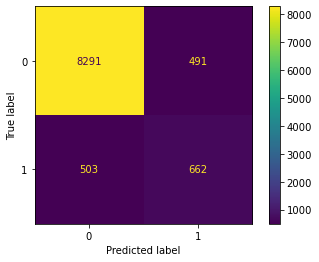

In [58]:
#tranforming X_test with OneHotEncoder 
encoded = ohe.transform(X_test[columns_to_ohe])
X_test_categorical_ohe = pd.DataFrame(encoded,
                                      columns=ohe.get_feature_names_out(),
                                      index=X_test.index)
X_test_preprocessed = pd.concat([X_test, X_test_categorical_ohe], axis=1).drop(columns_to_ohe, axis=1)

#making our y_test predictions
y_pred_test = clf_baseline.predict(X_test_preprocessed)

#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test); #8851 / 9947

Let's break down this confusion matrix, which shows the model's predictions out from 9,947 test records:

- predicted true positives (bottom right) 662 times (6.7% of all predictions)
- predicted false positives (top right) 491 times (5%)
- predicted true negatives (top left) 8,291 times (83.4%)
- predicted false negatives (bottom left) 503 times (5.1%)

So, this model is dealing with just a little bit more in the way of false negatives than false positives. **Which is a bigger deal for our stakeholder? Probably false negatives** because they represent current clients who would have made a term deposit, but weren't on the call list given to the hired call center.

False positives probably aren't as big a deal; sure, it's not ideal to have paid the call center to contact those clients who didn't wind up setting an account, but the "wasted" cost for those client calls was likely less than the profit they lose from false positives. All this to say, we want to priveldge **recall** as an evaluation metric here. 

In [59]:
#First I need to make my training set predictions
y_pred_train = clf_baseline.predict(X_train_preprocessed)
#Now we can proceed with the recall_score
from sklearn.metrics import recall_score
print('train recall:', recall_score(y_train, y_pred_train))
print('test recall:', recall_score(y_test, y_pred_test))

train recall: 1.0
test recall: 0.5682403433476395


In [60]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_test)

0.5711820534943919

That is some serious overfitting and a just okay test recall score. Hopefully our refined models make substantial improvements. Honestly, it wouldn't take *too* much to improve on that, so I wonder whether this vanilla model can even serve as a meaningful baseline. We shall see. For now, let's keep evaluating it and check out the ROC/AUC metric.

In [61]:
#Now we're ready to check the area under curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
print('train AUC:', auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('test AUC:', auc(fpr, tpr))

train AUC: 1.0
test AUC: 0.7561652639079349


This is just an okay test AUC score; it's definitely better than random guessing, but not by an impressive amount. Again, hopefully pruning our decision tree model and accounting for class imbalance will result in a significant improvement.

In [62]:
#Now we'll do a cross validation score with negative log loss because...we did it in earlier lessons.
from sklearn.model_selection import cross_val_score

#train
baseline_neg_log_loss_cv_train = cross_val_score(clf_baseline, X_train_preprocessed, y_train, scoring='neg_log_loss')
baseline_log_loss_train= -(baseline_neg_log_loss_cv_train.mean())
print('training log loss score:', baseline_log_loss_train)

#test
baseline_neg_log_loss_cv_test = cross_val_score(clf_baseline, X_test_preprocessed, y_test, scoring='neg_log_loss')
baseline_log_loss_test = -(baseline_neg_log_loss_cv_test.mean())
print('testing log loss score:', baseline_log_loss_test)

training log loss score: 3.9110330949055863
testing log loss score: 4.246860664610051


This is not as interpetable as the other metrics yet, but it will be once we start refining and reevaluating later models. 

### Next steps 

Class imbalance and tree pruning on this model. Afterwards, it's trying the whole thing again with a LogisticRegression model. 

## Addressing target class imbalance

We've learned about the class_weight hyperparameter, but that's for LogisticRegression models, so we'll run that later when we do a second model attempt. Actually, when you finish with the decision tree stuff and do LogisticRegression, go to the Logistic Regression - Cumulative Lab from Topic 26 and do that stuff. 

I'm realizing that class imbalance in decision trees hasn't been discussed yet, just in LogisticRegression. Nonetheless, there *is* a class_weight param for the DecisionTreeCladsifier model, too. What I still don't understand is how to apply the over & under-sampling by percentage technique that Mark discussed to a decision tree.

In [63]:
clf_balanced_class = DecisionTreeClassifier(criterion='entropy', random_state=713, class_weight="balanced")
clf_balanced_class.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=713)

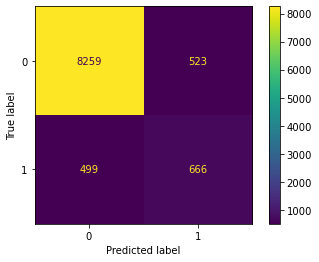

In [64]:
y_pred_test = clf_balanced_class.predict(X_test_preprocessed)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

The class_weight = 'balanced' model:

- predicted true positives (bottom right) 666 times (6.7% of all predictions, the baseline was also at 6.7%)
- predicted false positives (top right) 523 times (5.3%, baseline was 5.0%)
- predicted true negatives (top left) 8,259 times (83.0%, baseline was 83.4%)
- predicted false negatives (bottom left) 499 times (5.0%, baseline was 5.1%)

So, this model predicted four more true positives than the baseline, but 32 more false ones. Of course, that means it wasn't quite as good at predicting true negatives, but it was slightly better at false negatives. This is a mixed bag improvement-wise, but it does bode well for an improvement in the recall score, which we are more concerned with in this case. Let's check to be sure:

In [65]:
print('recall:', recall_score(y_test, y_pred_test))

recall: 0.5716738197424893


That's a pretty slight improvement over the baseline score of 0.568; let's keep checking evaluation metrics with the AUC: 

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('AUC:', auc(fpr, tpr))

AUC: 0.7560600936562595


This is a slight reduction compared to the baseline's 0.75617. There's definitely more to improve upon here, but we're on our way. Let's finally check the cross-validated loss score:

In [67]:
balanced_class_neg_log_loss_cv = cross_val_score(clf_balanced_class, X_test_preprocessed, y_test, scoring='neg_log_loss')
balanced_class_log_loss = -(balanced_class_neg_log_loss_cv.mean())
balanced_class_log_loss

4.228706387089582

This is a slight improvement over the baseline's 4.246860664610051 score. 

### Further improvement of the class imbalance problem

So far, we found some modest improvement with the 'balanced' class_weight parameter, but I still need to further tweak it. I'm not sure how, though. Can I use SMOTE here? [The docs also mention a dictionary of class weights to run](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), do I run different dictionaries with SMOTE like we did in that one cumulative lab? 

In [68]:
import imblearn
print(imblearn.__version__)

0.11.0


Oversampling and undersampling has not yet been covered in the curriciulum outside of SMOTE, so I found a helpful resourcse [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and am going to practice a bit below using some of the code snippets from that site.

In [69]:
y_train.value_counts()

0    35140
1     4645
Name: y, dtype: int64

Ok, so we have what we expect here, 80% of the total 49k dataset records in X & y train. We also see how y_train has a 87/13% no/yes split. 

Now we're going to see what happens when we use and play around with imblearn's RandomOverSampler tool:

In [70]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=713)
# fit and apply the transform
X_train_preprocessed_over, y_train_over = oversample.fit_resample(X_train_preprocessed, y_train)
#How does y_over look now?
y_train_over.value_counts()

0    35140
1    35140
Name: y, dtype: int64

In [71]:
len(y_train)/len(y_train_over)

0.5660927717700626

Ok, y_over is not only completely balanced, but also a *lot* bigger than it used to be. What's X_train like?

In [72]:
len(X_train_preprocessed_over)

70280

In [73]:
len(X_train_preprocessed)/len(X_train_preprocessed_over)

0.5660927717700626

Wow, this oversampled X_train is a lot bigger (and by the same amount as y_over is than y_train). So, X_over & y_over are a synthetic training dataset that may or may not result in better results. If I had to guess, I'd bet the training scores will still be way overfit and the test scores will because we oversampled too much here at the outset, but let's see. 

In [74]:
#fit the model to X_over & y_over
clf_oversample_minority = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_oversample_minority.fit(X_train_preprocessed_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', random_state=713)

In [75]:
#make predictions for our evaluation metrics
#Remember, we can't do any oversampling with the test set
y_pred_test_over = clf_oversample_minority.predict(X_test_preprocessed)

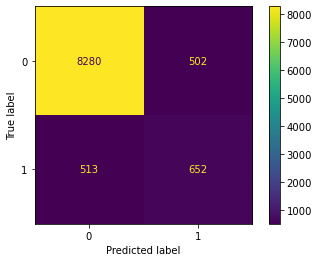

In [76]:
#confusion matrix for this new oversampling model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_over);

The oversampling with RandomOverSampler(sampling_strategy='minority') model:

- predicted true positives (bottom right) 652 times (6.6% of all predictions, the baseline had 6.7%)
- predicted false positives (top right) 502 times (5.1%, baseline was 5.0%)
- predicted true negatives (top left) 8,280 times (83.2%, baseline was 83.4%)
- predicted false negatives (bottom left) 513 times (5.2%, baseline was 5.1%)

To review, our last model (class_weight = 'balanced') showed the following results:

- predicted true positives 666 times (6.7%)
- predicted false positives 523 times (5.3%)
- predicted true negatives 8,259 times (83.0%)
- predicted false negatives 499 times (5.0%)

So that means both newer models are similar and slightly better than the baseline recall-wise, but the earlier class_weight = 'balanced' was better than this latest one. However, I wonder to what extent RandomOverSampler(sampling_strategy='minority') introduced noise into the training data; the resulting X_train_preprocessed_over and y_train_over datasets were a lot larger.

Subsequently, we can try oversampling to more subtle degrees and see whether our models improve. Before doing that, let's keep looking at our other metrics to see how this latest model performed.

In [77]:
#recall scores
#We can't do a train score here because y_train and y_train_over are different sizes
print('recall:', recall_score(y_test, y_pred_test_over))

recall: 0.559656652360515


Looks like a slight reduction from the baseline score of 0.56824 and certaintly
not as good as the class_weight = 'balanced' model's 0.5717.

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over)
print("oversampling = 'minority' AUC:", auc(fpr, tpr))

oversampling = 'minority' AUC: 0.7512471373849944


This is a really slight reduction from the baseline's 0.7562 as well as the class_weight = 'balanced' model's AUC of 0.7561, but these differences are so small that they're likely negligible and we're not really differing much from the baseline so far.

### Iterating through more subtle oversampling parameters

I know that the maximum we should really try to oversample to is half the size of the classes, so let's try iterating through several more subtle sample_strategy params and see whether we can find a better result along the way. I'm only supposed to go as high as 150%, so the following dictionaries for our next iteration attempt will reflect 150% oversampling down to 110%, moving in 10% increments (so 150%, 140%, 130%, 120%, and 110%):

In [79]:
sampling_strategies = [{0:35140, 1:6968}, {0:35140, 1:6503}, {0:35140, 1:6039}, {0:35140, 1:5574}, {0:35140, 1:5156}]

In [80]:
recall_scores = []
auc_scores = []

sampling_strategies = sampling_strategies
for i in sampling_strategies:
    # define oversampling strategy
    oversample = RandomOverSampler(random_state=713, sampling_strategy=i)
    # fit and apply the transform
    X_train_preprocessed_over, y_train_over = oversample.fit_resample(X_train_preprocessed, y_train)    
    #instantiate & fit the model to X_over & y_over
    clf_oversample_float = DecisionTreeClassifier(criterion='entropy', random_state=713)
    clf_oversample_float.fit(X_train_preprocessed_over, y_train_over)
    #make predictions for our evaluation metrics
    y_pred_test_over = clf_oversample_float.predict(X_test_preprocessed)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test_over))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for 1.5 down through 1.1 sample_strategy dictionaries:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Recall & AUC scores for 1.5 down through 1.1 sample_strategy dictionaries:
recall scores: [0.5587982832618026, 0.5896995708154507, 0.5665236051502146, 0.582832618025751, 0.5802575107296137]
auc_scores:    [0.7521843841724636, 0.7675211586712188, 0.7553068948092224, 0.7651694404180224, 0.7616614358476126]


In [81]:
print('maximum recall score:', max(recall_scores))
print('maximum AUC score:', max(auc_scores))

maximum recall score: 0.5896995708154507
maximum AUC score: 0.7675211586712188


When we oversample the minority class in our target ("yes", aka "1") by 140%, we achieve the best recall score among these, which is also the best we've seen so far. The highest AUC score also appears at this oversampling rate. Let's position the 140% oversampling model as our best so far and check the other evaluation metrics:

In [82]:
#Set oversampling to 140%
oversample = RandomOverSampler(random_state=713, sampling_strategy={0:35140, 1:6503})
# fit and apply the transform
X_train_preprocessed_over, y_train_over = oversample.fit_resample(X_train_preprocessed, y_train)    
#instantiate & fit the model to X_over & y_over
clf_oversample_140 = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_oversample_140.fit(X_train_preprocessed_over, y_train_over)

#make predictions for our evaluation metrics
y_pred_test_over = clf_oversample_140.predict(X_test_preprocessed)

#confirming recall score
print('recall score when oversampling at 140%:', recall_score(y_test, y_pred_test_over))
#calculate auc score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over)
print('AUC score when oversampling at 140%', auc(fpr, tpr))

recall score when oversampling at 140%: 0.5896995708154507
AUC score when oversampling at 140% 0.7675211586712188


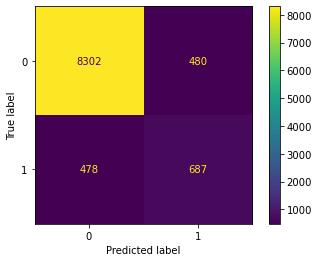

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_over);

The oversampling at 140% model:

- predicted true positives (bottom right) 687 times (6.9% of all predictions, the baseline had 6.7%)
- predicted false positives (top right) 480 times (4.8%, baseline was 5.0%)
- predicted true negatives (top left) 8,302 times (83.5%, baseline was 83.4%)
- predicted false negatives (bottom left) 478 times (4.8%, baseline was 5.1%)

Definitely the best we've done so far.

### Undersampling and then SMOTE

Time to move on to undersampling and SMOTE.

In [84]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=713, sampling_strategy='majority')
X_train_preprocessed_under, y_train_under = undersample.fit_resample(X_train_preprocessed, y_train)
len(X_train_preprocessed_under), len(y_train_under)

(9290, 9290)

In [85]:
len(X_train), len(y_train)

(39785, 39785)

In [86]:
y_train.value_counts()

0    35140
1     4645
Name: y, dtype: int64

In [87]:
y_train_under.value_counts()

0    4645
1    4645
Name: y, dtype: int64

Okay, so it "balanced" y_train's classes and X_train is the same size as y_train now. I get it. Now let's fit them to a clf and see what happens:

In [88]:
clf_undersampled_majority = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_undersampled_majority.fit(X_train_preprocessed_under, y_train_under)

DecisionTreeClassifier(criterion='entropy', random_state=713)

In [89]:
#make predictions for the undersampling model
y_pred_test_under = clf_undersampled_majority.predict(X_test_preprocessed)

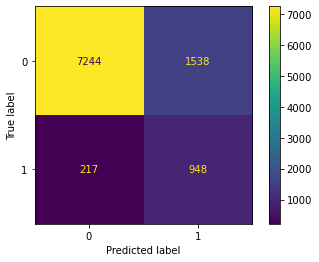

In [90]:
#confusion matrix for this undersampling model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_under);

The undersampling with RandomUnderSampler(sampling_strategy='majority') model:

- predicted true positives (bottom right) 948 times (9.5% of all predictions, the baseline had 6.7%)
- predicted false positives (top right) 1,538 times (at a whopping 15.5%! The baseline was 5.0%)
- predicted true negatives (top left) 7,244 times (72.8%, baseline was 83.4%)
- predicted false negatives (bottom left) 217 times (2.2%, baseline was 5.1%)

To review, our last best model predicted:

- predicted true positives 687 times (6.9%)
- predicted false positives 480 times (4.8%)
- predicted true negatives 8,302 times (83.5%)
- predicted false negatives 478 times (4.8%)

It's great that the undersampling (strategy = 'majority') model has so few false negatives, but **I doubt 1,058 more wasted calls is worth 261 more term deposits. Or maybe it is, I don't really know, only the stakeholder would.** 

Now let's attempt to refine training data undersampling ratios and see if we improve from here. Below, I layout undersampling strategies for less drastic ratios: 90%, 80%, 70%, 60%, and 50% of the majority, then iterate through them to see if we find an improved model.

In [91]:
sampling_strategies = [{0:31626, 1:4645}, {0:28112, 1:4645}, {0:24598, 1:4645}, {0:21084, 1:4645}, {0:17570, 1:4645}]

In [92]:
recall_scores = []
auc_scores = []

sampling_strategies = sampling_strategies
for i in sampling_strategies:
    # define undersampling strategy
    undersample = RandomUnderSampler(random_state=713, sampling_strategy=i)
    # fit and apply the transform
    X_train_preprocessed_under, y_train_under = undersample.fit_resample(X_train_preprocessed, y_train)    
    #instantiate & fit the model to X_over & y_over
    clf_undersample_float = DecisionTreeClassifier(criterion='entropy', random_state=713)
    clf_undersample_float.fit(X_train_preprocessed_under, y_train_under)
    #make predictions for our evaluation metrics
    y_pred_test_under = clf_undersample_float.predict(X_test_preprocessed)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test_under))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_under)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for 0.9 through 0.5 sample_strategy undersampling dictionaries:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Recall & AUC scores for 0.9 through 0.5 sample_strategy undersampling dictionaries:
recall scores: [0.5939914163090129, 0.6180257510729614, 0.6171673819742489, 0.6686695278969957, 0.6686695278969957]
auc_scores:    [0.7664218069930399, 0.773599530057091, 0.7736258226200099, 0.791406046116569, 0.7888439873600215]


In [93]:
print('max recall score:', max(recall_scores))
print('max AUC score:', max(auc_scores))

max recall score: 0.6686695278969957
max AUC score: 0.791406046116569


It looks like the best recall and AUC pairing comes with an undersampling strategy of 60%. Let's evaluate more metrics with that specific model:

In [94]:
#Setting undersampling to 60%
undersample = RandomUnderSampler(random_state=713, sampling_strategy={0:21084, 1:4645})
# fit and apply the transform
X_train_preprocessed_under, y_train_under = undersample.fit_resample(X_train_preprocessed, y_train)    
#instantiate & fit the model to X_under & y_under
clf_undersample_60 = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_undersample_60.fit(X_train_preprocessed_under, y_train_under)

#make predictions for our evaluation metrics
y_pred_test_under = clf_undersample_60.predict(X_test_preprocessed)

#confirming recall score
print('recall score when undersampling at 60%:', recall_score(y_test, y_pred_test_under))
#confirming auc score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_under)
print('AUC score when undersampling at 60%', auc(fpr, tpr))

recall score when undersampling at 60%: 0.6686695278969957
AUC score when undersampling at 60% 0.791406046116569


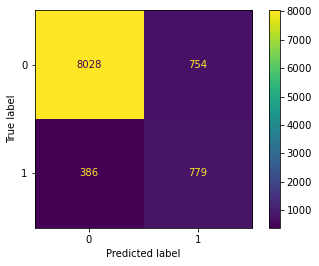

In [95]:
#confusion matrix for this undersampling model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_under);

This model with random undersampling at 60% of the majority class:

- predicted true positives (bottom right) 779 times (7.8% of all predictions, the baseline had 6.7%)
- predicted false positives (top right) 754 times (7.6%, baseline was 5.0%)
- predicted true negatives (top left) 8,028 times (80.7%, baseline was 83.4%)
- predicted false negatives (bottom left) 386 times (3.9%, baseline was 5.1%)

To review, our last best model predicted:

- predicted true positives 687 times (6.9%)
- predicted false positives 480 times (4.8%)
- predicted true negatives 8,302 times (83.5%)
- predicted false negatives 478 times (4.8%)

This model is predicting a great amount of true positives, but also more false postives (although those aren't too big a deal overall). It's a little lower on the true negatives than most other models, but it has a good low amount of false negatives. **Compared to the last best model, it would result in 92 more term deposits, but at the expense of 274 more wasted call center calls** (again, the stakeholder would know whether that's worth it). 

For now, with recall being our important metric, let's priveldge this model as our current best even with its increased false postives. 

### Trying to combine over & undersampling

In [96]:
#Oversample by 140%
X_train_preprocessed_over_under, y_train_over_under = oversample.fit_resample(X_train_preprocessed, 
                                                                              y_train)
#Then fit undersampling by 60% to that same data
X_train_preprocessed_over_under, y_train_over_under = undersample.fit_resample(X_train_preprocessed_over_under, 
                                                                               y_train_over_under)
#instantiate & fit a model to the over & undersampled data
clf_over_under = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_over_under.fit(X_train_preprocessed_over_under, y_train_over_under)

#make predictions for our evaluation metrics
y_pred_test_over_under = clf_over_under.predict(X_test_preprocessed)

#confirming recall score
print('recall score when undersampling at 60% & oversampling at 140%:', recall_score(y_test, y_pred_test_over_under))
#confirming auc score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over_under)
print('AUC score when undersampling at 60% & oversampling at 140%:', auc(fpr, tpr))

recall score when undersampling at 60% & oversampling at 140%: 0.5836909871244635
AUC score when undersampling at 60% & oversampling at 140%: 0.7551226513850512


Never mind, it's not as good as previous models. Okay, let's move on to SMOTE,

### SMOTE

This is a different kind of oversampling technique, let's see if it improves the model.

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=713)
X_train_preprocessed_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
y_train_smote.value_counts()

0    35140
1    35140
Name: y, dtype: int64

In [98]:
clf_smote = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_smote.fit(X_train_preprocessed_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=713)

In [99]:
y_pred_test_smote = clf_smote.predict(X_test_preprocessed)
#confirming recall score
print('recall score with SMOTE:', recall_score(y_test, y_pred_test_smote))
#confirming auc score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_smote)
print('AUC score with SMOTE:', auc(fpr, tpr))

recall score with SMOTE: 0.5742489270386266
AUC score with SMOTE: 0.7535330264890241


These are good scores, but not as good as undersampling at 60%. Let's check out the SMOTE confusion matrix:

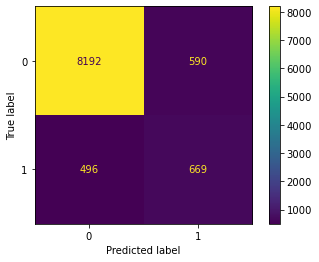

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_smote);

This SMOTE model:

- predicted true positives (bottom right) 718 times (7.2% of all predictions, the baseline had 4.8%)
- predicted false positives (top right) 645 times (6.5%, the baseline was 4.1%)
- predicted true negatives (top left) 8,137 times (81.8%, baseline was 84.2%)
- predicted false negatives (bottom left) 447 times (4.5%, baseline was 6.9%)

To review, our last best model (undersampling at 60%) showed the following results:

- predicted true positives 779 times (7.8%)
- predicted false positives 754 times (7.6%)
- predicted true negatives 8,028 times (80.7%)
- predicted false negatives 386 times (3.9%)

SMOTE is a definite improvement over the baseline, but it doesn't quite perform as well from our recall-oriented concerns, so our best decision tree model is the undersampling one.  

## Decision Tree Pruning

Next, we'll see whether tuning the model's 'max_depth', 'min_samples_split', and 'min_samples_leaf' hyperparameters help improve results. If they don't, so help me God, I am so tired of working hard and having nothing to show for it. 

First, let's bring back the evaluation metrics for our best model:

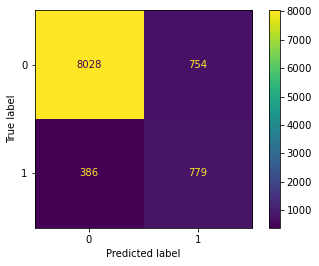

In [101]:
y_pred_test = clf_undersample_60.predict(X_test_preprocessed)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

In [102]:
print('recall:', recall_score(y_test, y_pred_test))

recall: 0.6686695278969957


In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('AUC:', auc(fpr, tpr))

AUC: 0.791406046116569


In [105]:
balanced_class_neg_log_loss_cv = cross_val_score(clf_undersample_60, X_test_preprocessed, y_test, scoring='neg_log_loss')
balanced_class_log_loss = -(balanced_class_neg_log_loss_cv.mean())
balanced_class_log_loss

4.246860664610051

Great stuff, now let's try iterating through various modes for the model's 'max_depth' hyperparameter first:

best test score: 0.8121909524260998


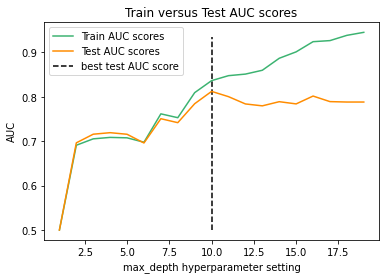

In [106]:
#Let's try up to 12 for now since it takes a minute for my laptop to run just one model
max_depth = np.arange(1,20)

#setup lists for plotting 
train_auc_values = []
test_auc_values = []

#iterating through max_values and filling the lists above
for i in max_depth:
    #initialize & train the classifier
    temp_clf = DecisionTreeClassifier(criterion="entropy", 
                                      random_state=713, 
                                      max_depth=i)
    temp_clf.fit(X_train_preprocessed_under, y_train_under)
    #calculate & append training AUC
    y_train_hat = temp_clf.predict(X_train_preprocessed)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_hat)
    train_roc_auc = auc(train_fpr, train_tpr)
    train_auc_values.append(train_roc_auc)
    #calculate & append AUC
    y_test_hat = temp_clf.predict(X_test_preprocessed)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_hat)
    test_roc_auc = auc(test_fpr, test_tpr)
    test_auc_values.append(test_roc_auc)
print("best test score:", max(test_auc_values))
#Plot
fig, ax = plt.subplots()
ax.plot(max_depth, train_auc_values, color='mediumseagreen', label='Train AUC scores')
ax.plot(max_depth, test_auc_values, color='darkorange', label='Test AUC scores')
ax.set_title('Train versus Test AUC scores')
ax.set_xlabel('max_depth hyperparameter setting')
ax.set_ylabel('AUC')
ax.vlines(10, ymin=0.5, ymax=0.935, color='k', linestyle='--', label="best test AUC score")
ax.legend();

Alright, we have an optimal max_depth setting of 10, which results in an improved AUC of 0.8122. That's a decent improvement over our best non-hyperparameter-optimized model (the undersampled by 60% model) AUC of 0.79141. Before refining more hyperparams, let's stop for a second and evaluate this model with max_depth=10 in regards to recall & neg_log_loss:

In [107]:
clf_undersample_60_md_10 = DecisionTreeClassifier(criterion='entropy', 
                                                  random_state=713, 
                                                  max_depth=10)
clf_undersample_60_md_10.fit(X_train_preprocessed_under, y_train_under)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=713)

In [108]:
y_pred_test_undersample_60_md_10 = clf_undersample_60_md_10.predict(X_test_preprocessed)
recall_score(y_test, y_pred_test_undersample_60_md_10)

0.703862660944206

In [109]:
f1_score(y_test, y_pred_test_undersample_60_md_10)

0.6112560566530003

That's the best recall score we've seen so far. We're starting to get into the "good" recall range. Let's also run the log_loss metric:

In [110]:
under_60_md_10_neg_log_loss_cv = cross_val_score(clf_undersample_60_md_10, X_test_preprocessed, y_test, scoring='neg_log_loss')
under_60_md_10_log_loss = -(under_60_md_10_neg_log_loss_cv.mean())
under_60_md_10_log_loss

1.5244839608306981

Wow, that's a lot better than the non-max-depth-optimized score of 4.24686! Okay, now let's move on to tuning the 'min_samples_splits' hyperparam.

best test AUC score: 0.7220758320521004


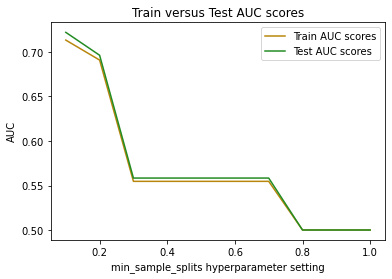

In [111]:
#I think we do this ratio with floats, at least at first
min_samples_split = np.arange(0.1,1.1,0.1)

#setup lists for plotting 
train_auc_values = []
test_auc_values = []

#iterating through max_values and filling the lists above
for i in min_samples_split:
    #initialize & train the classifier
    temp_clf = DecisionTreeClassifier(criterion='entropy', 
                                      random_state=713, 
                                      min_samples_split=i)
    temp_clf.fit(X_train_preprocessed_under, y_train_under)
    #calculate & append training AUC
    y_train_hat = temp_clf.predict(X_train_preprocessed)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_hat)
    train_roc_auc = auc(train_fpr, train_tpr)
    train_auc_values.append(train_roc_auc)
    #calculate & append AUC
    y_test_hat = temp_clf.predict(X_test_preprocessed)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_hat)
    test_roc_auc = auc(test_fpr, test_tpr)
    test_auc_values.append(test_roc_auc)
print("best test AUC score:", max(test_auc_values))
#Plot
fig, ax = plt.subplots()
ax.plot(min_samples_split, train_auc_values, color='darkgoldenrod', label='Train AUC scores')
ax.plot(min_samples_split, test_auc_values, color='forestgreen', label='Test AUC scores')
ax.set_title('Train versus Test AUC scores')
ax.set_xlabel('min_sample_splits hyperparameter setting')
ax.set_ylabel('AUC')
#ax.vlines(0.7, ymin=0.70, ymax=0.93, color='k', linestyle='--', label="my best guess")
ax.legend();

This doesn't help, so let's try adjusting 'min_samples_leaf' 

best test AUC score: 0.6455277718861151


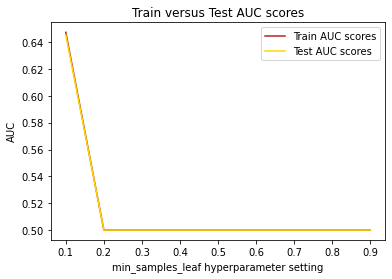

In [112]:
# Calculate the optimal value for minimum sample leafs
min_samples_leaf = np.arange(0.1,1.0,0.1)

#setup lists for plotting 
train_auc_values = []
test_auc_values = []

#iterating through max_values and filling the lists above
for i in min_samples_leaf:
    #initialize & train the classifier
    temp_clf = DecisionTreeClassifier(criterion='entropy', 
                                      random_state=713, 
                                      min_samples_leaf=i)
    temp_clf.fit(X_train_preprocessed_under, y_train_under)
    #calculate & append training AUC
    y_train_hat = temp_clf.predict(X_train_preprocessed)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_hat)
    train_roc_auc = auc(train_fpr, train_tpr)
    train_auc_values.append(train_roc_auc)
    #calculate & append AUC
    y_test_hat = temp_clf.predict(X_test_preprocessed)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_hat)
    test_roc_auc = auc(test_fpr, test_tpr)
    test_auc_values.append(test_roc_auc)
print("best test AUC score:", max(test_auc_values))
#Plot
fig, ax = plt.subplots()
ax.plot(min_samples_leaf, train_auc_values, color='firebrick', label='Train AUC scores')
ax.plot(min_samples_leaf, test_auc_values, color='gold', label='Test AUC scores')
ax.set_title('Train versus Test AUC scores')
ax.set_xlabel('min_samples_leaf hyperparameter setting')
ax.set_ylabel('AUC')
#ax.vlines(0.2, ymin=0.5, ymax=0.8, color='k', linestyle='--', label="my best guess")
ax.legend();

Ok...tuning 'min_sample_leaf' along with 'min_samples_split' only worsens the model, so there we have it: **clf_undersample_60_md_10 is the best decision tree model**. One thing we haven't done yet is investigate its Confusion Matrix:

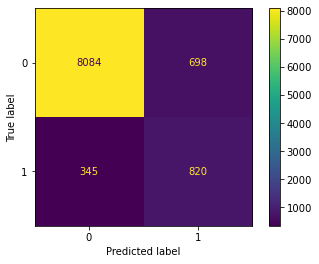

In [113]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_undersample_60_md_10);

This undersampling at 60% and max_depth=10 model:

- predicted true positives (bottom right) 820 times (8.2% of all predictions, the baseline had 4.8%)
- predicted false positives (top right) 698 times (7.0%, the baseline was 4.1%)
- predicted true negatives (top left) 8,084 times (81.3%, baseline was 84.2%)
- predicted false negatives (bottom left) 345 times (3.5%, baseline was 6.9%)

To review, our last best model (undersampling at 60%, but no max_depth specified) showed the following results:

- predicted true positives 779 times (7.8%)
- predicted false positives 754 times (7.6%)
- predicted true negatives 8,028 times (80.7%)
- predicted false negatives 386 times (3.9%)

So, adding in the max_depth=10 param to our already-undersampled model improved the recall, AUC, and log_loss score. It also increased the number of true positives and decreased the number false negatives, which means more successful term deposits for our stakeholder, even if it came at the cost of fewer true negatives & more false positives. 

While I may not know the specific financial gains & losses of term deposits versus wasted call center calls, I do know this model has best recall score (so the most term deposits) without an extreme number of false positives (like one model that has only 229 false negatives, but over 1,500 false positives). 

Next steps: 

1. Did I run those 'min_sample_leaf' along with 'min_samples_split' hyperparam nodes correctly? I think they work fine as floats because they're proportions as opposed to ints as exact numbers of leaves/splits.
2. What are the params of this dccwbmd13 model? Is that a thing? <----no, it is not.
3. Am I interpreting the recall and AUC scores a little too broadly? They are relative metrics that depend on the nature of the data.
4. LogisticRegression model

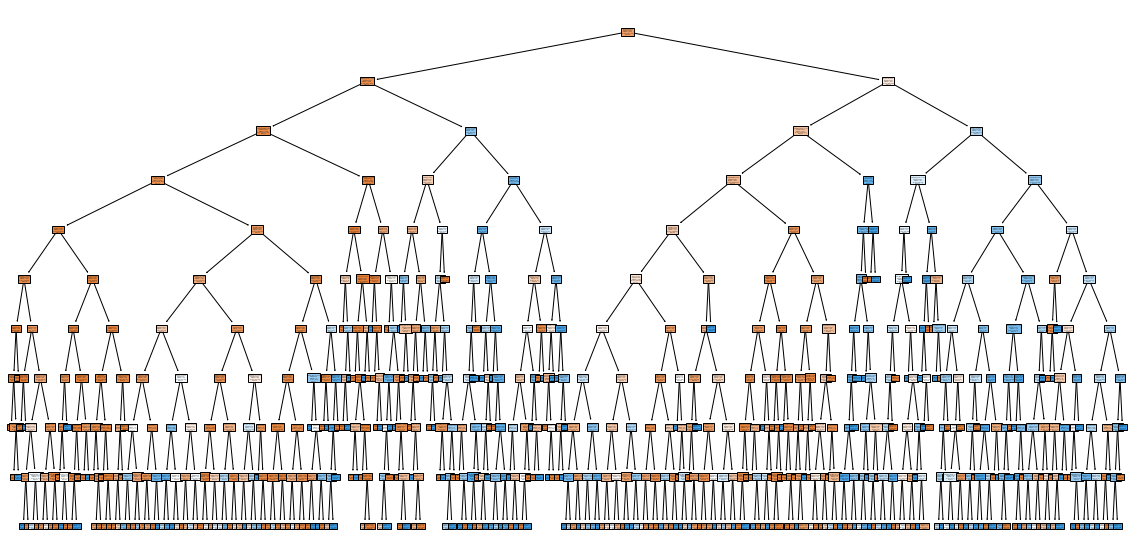

In [114]:
#Checking out the tree plot
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(clf_undersample_60_md_10,
              feature_names = X_train_preprocessed_under.columns,
              class_names = np.unique(y).astype('str'),
              filled=True)
plt.show();

This looks more reasonable than the Leviathan horror we saw in the baseline model's tree plot. This is still not easy to interpret, but we're more focused on predictions here, not necessarily a thorough understanding of how the model explains the data. 

Our final model boasts a good AUC of 0.81219, a respectable recall score of 0.7039, and good relative log-loss at 1.5245 (which we can only interpret in relation to the baseline's 4.2469). It optimizes the number of term deposits without *too* many wasted calls. Specifically, it should help the stakeholder successfully land 158 more term deposits, but at the expense of 207 unsuccesful calls to pay for at the call center. Without knowing exactly what the bank tends to gain from a term deposit and the call center rates, I think this is the best decision tree model in terms of maximizing deposits and saving money. 

Let's see if we can improve on this optimized decision tree with logistic regression models from StatsModels and Scikit-Learn. 

## establishing a baseline StatsModels Logit model

Statistical significance still matters in logistic regression. It seems like the most effective way to check our data for it is to fit a StatsModels Logit model to it and see how it measures up. 

### normalizing features for Logit models

X_train_preprocessed is ready for a decision tree model, but not for the StatsModels & Scikit-Learn Logit models because its continuous features have not yet been normalized. Let's create a X_train_preprocessed_normalized for them.

In [145]:
columns_to_normalize = ['age', 'balance', 'campaign', 'pdays', 'previous']

#importing, instantiating, and fitting MinMaxScaler to X_train's continuous columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_preprocessed_normalized_columns = scaler.fit_transform(X_train[columns_to_normalize])

#new column names for normalized columns so I can drop their non-normalized counterparts
normalized_column_names = ['age_normalized', 'balance_normalized', 
                           'campaign_normalized', 'pdays_normalized', 'previous_normalized']

#Turning it back into a DataFrame
X_train_preprocessed_normalized_df = pd.DataFrame(X_train_preprocessed_normalized_columns,
                                      columns=normalized_column_names,
                                      index=X_train.index)
X_train_preprocessed_normalized = pd.concat([X_train_preprocessed_normalized_df, 
                                             X_train_preprocessed], axis=1).drop(columns_to_normalize, axis=1)
X_train_preprocessed_normalized

,age_normalized,balance_normalized,campaign_normalized,pdays_normalized,previous_normalized,day,month,duration,month-day,job_blue-collar,...,education_2,education_3,default_1,housing_1,loan_1,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
22065,0.428571,0.104452,0.161290,0.000000,0.000000,20,8,135,0820,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23946,0.467532,0.077034,0.048387,0.000000,0.000000,29,8,436,0829,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14232,0.220779,0.084488,0.016129,0.000000,0.000000,14,7,330,0714,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15211,0.415584,0.072976,0.048387,0.000000,0.000000,17,7,209,0717,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24198,0.207792,0.073757,0.000000,0.225917,0.007273,17,11,303,1117,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47464,0.155844,0.090271,0.000000,0.000000,0.000000,6,2,170,0206,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2114,0.467532,0.069744,0.016129,0.000000,0.000000,12,5,288,0512,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
46755,0.220779,0.082790,0.016129,0.000000,0.000000,29,1,127,0129,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18813,0.415584,0.083135,0.112903,0.000000,0.000000,31,7,73,0731,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [146]:
#I had to cast X_train_preprocessed as ints at one point for StatsModels' Logit, but 
# just remember, this can't be done to X_train_preprocessed_normalized.

#X_train_preprocessed = X_train_preprocessed.astype(int)
#X_train_preprocessed.info()

In [152]:
#adding the constant to X_train
X = sm.add_constant(X_train_preprocessed_normalized)
#y = np.asarray(y_train)
#instantiating & fitting the Logit model
logit_model = sm.Logit(y_train.astype(float), X.astype(float))
baseline_result = logit_model.fit(maxiter=3500)
#checking the results
baseline_result.summary()

Optimization terminated successfully.
         Current function value: 0.250569
         Iterations 3389


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                39785
Model:                          Logit   Df Residuals:                    39751
Method:                           MLE   Df Model:                           33
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                  0.3048
Time:                        21:03:53   Log-Likelihood:                -9968.9
converged:                       True   LL-Null:                       -14339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3680      0.180    -13.141      0.000      -2.721      -2.015
age_normalized      -4.127e-05      0.176     -0.000      1.000      -0.346       0.346
balance_normalized      2.0905      0.555      3.769      0.000       1.003       3.178
campaign_normalized    -6.4386      0.649     -9.926      0.000      -7.710      -5.167
pdays_normalized        0.2586      0.279      0.927      0.354      -0.288       0.806
previous_normalized     1.8241      1.697      1.075      0.282      -1.503       5.151
day                    -0.0054        nan        nan        nan         nan         nan
month                   0.0009        nan        nan        nan         nan         nan
duration                0.0041   6.68e-05     60.832      0.000       0.004       0.004
month-day              -0.0002        nan        nan        nan         nan         nan
job_blue-collar        -0.3756      0.075     -5.003      0.000      -0.523      -0.228
job_entrepreneur       -0.5923      0.132     -4.481      0.000      -0.851      -0.333
job_housemaid          -0.5138      0.138     -3.720      0.000      -0.784      -0.243
job_management         -0.3119      0.076     -4.082      0.000      -0.462      -0.162
job_retired             0.3383      0.099      3.403      0.001       0.143       0.533
job_self-employed      -0.3511      0.113     -3.096      0.002      -0.573      -0.129
job_services           -0.3038      0.087     -3.480      0.001      -0.475      -0.133
job_student             0.4215      0.113      3.734      0.000       0.200       0.643
job_technician         -0.3336      0.072     -4.647      0.000      -0.474      -0.193
job_unemployed         -0.3555      0.120     -2.968      0.003      -0.590      -0.121
job_unknown            -0.2035      0.227     -0.897      0.370      -0.648       0.241
marital_married        -0.1853      0.061     -3.043      0.002      -0.305      -0.066
marital_single          0.0986      0.070      1.418      0.156      -0.038       0.235
education_1            -0.2116      0.108     -1.951      0.051      -0.424       0.001
education_2            -0.0346      0.096     -0.362      0.717      -0.222       0.153
education_3             0.2394      0.100      2.386      0.017       0.043       0.436
default_1              -0.0750      0.166     -0.452      0.651      -0.400       0.250
housing_1              -0.7721      0.042    -18.286      0.000      -0.855      -0.689
loan_1                 -0.6046      0.063     -9.641      0.000      -0.727      -0.482
contact_telephone      -0.0618      0.076     -0.811      0.418      -0.211       0.088
contact_unknown        -1.1988      0.062    -19.387      0.000      -1.320      -1.078
poutcome_other          0.2437      0.092      2.654      0.008       0.064       0.424
poutcome_success        2.2975      0.085     27.019      0.000       2.131       2.464
poutcome_unknown       -0.1915      0.096     -1.991      0.046      -0.3

Overall, this model has an acceptable p-value as do most of its attributes, but a few of them don't:

- 'age_normalized'
- 'pdays_normalized'
- 'previous_normalized'
- the date columns ('day', 'month', and 'month-day')
- 'job_unknown'
- 'marital_single'
- 'education_1' & 'education_2'
- 'default_1'
- 'contact_telephone'

Will the model improve when we get rid of them? Let's run some metrics on this baseline first.

In [153]:
#normalizing X_test's continuous columns 
X_test_preprocessed_normalized_columns = scaler.transform(X_test[columns_to_normalize])

#new column names for normalized columns so I can drop their non-normalized counterparts
normalized_column_names = ['age_normalized', 'balance_normalized', 
                           'campaign_normalized', 'pdays_normalized', 'previous_normalized']

#Turning it back into a DataFrame
X_test_preprocessed_normalized_df = pd.DataFrame(X_test_preprocessed_normalized_columns,
                                      columns=normalized_column_names,
                                      index=X_test.index)
X_test_preprocessed_normalized = pd.concat([X_test_preprocessed_normalized_df, 
                                             X_test_preprocessed], axis=1).drop(columns_to_normalize, axis=1)
#X_test_preprocessed_normalized

#making predictions
X_test_for_pred = sm.add_constant(X_test_preprocessed_normalized)
y_pred_test = round(baseline_result.predict(X_test_for_pred), 0).astype(int)

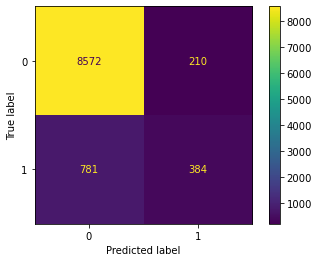

In [154]:
#building a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

This StatsModels baseline:

- predicted true positives (bottom right) 384 times (3.9% of all predictions)
- predicted false positives (top right) 210 times (2.1%)
- predicted true negatives (top left) 8,572 times (86.2%)
- predicted false negatives (bottom left) 781 times (7.9%)

Overall, these results aren't good: too few true positives and too many false negatives. However, we know there are a few columns with unacceptable p-values. This didn't matter for a decision tree model, but it may matter for our Logit model here.

Let's check out some evaluation metrics before we start refining this model.

In [155]:
print('recall score:', recall_score(y_test, y_pred_test))

recall score: 0.3296137339055794


Oof, not great. What about AUC?

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('test AUC:', auc(fpr, tpr))

test AUC: 0.6528505927555681


Kind of meh. What about the log loss cross val score?

In [138]:
#from sklearn.model_selection import cross_val_score
#baseline_neg_log_loss_cv_test = cross_val_score(result, X_test_preprocessed, y_test, scoring='neg_log_loss')
#baseline_log_loss_test = -(baseline_neg_log_loss_cv_test.mean())
#print('testing log loss score:', baseline_log_loss_test)

That throws an error; it's only for scikit-learn stuff. Now let's drop the bad columns and see whether that helps:

In [157]:
columns_to_drop = ['age_normalized', 'pdays_normalized', 'previous_normalized', 'day', 'month', 'month-day',
                   'job_unknown', 'marital_single', 'education_1', 'education_2', 'default_1', 'contact_telephone']
X_train_preprocessed_normalized_with_acceptable_pvals = X_train_preprocessed_normalized.drop(columns_to_drop, axis=1)

In [158]:
#adding the constant to X_train
X = sm.add_constant(X_train_preprocessed_normalized_with_acceptable_pvals)
#y = np.asarray(y_train)
#instantiating & fitting the Logit model
logit_model = sm.Logit(y_train.astype(float), X.astype(float))
selective_result = logit_model.fit(maxiter=3500)
#checking the results
selective_result.summary()

Optimization terminated successfully.
         Current function value: 0.250896
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                39785
Model:                          Logit   Df Residuals:                    39763
Method:                           MLE   Df Model:                           21
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                  0.3038
Time:                        21:05:03   Log-Likelihood:                -9981.9
converged:                       True   LL-Null:                       -14339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.4188      0.093    -26.117      0.000      -2.600      -2.237
balance_normalized      1.9897      0.551      3.609      0.000       0.909       3.070
campaign_normalized    -6.7391      0.644    -10.458      0.000      -8.002      -5.476
duration                0.0041   6.67e-05     60.893      0.000       0.004       0.004
job_blue-collar        -0.4108      0.071     -5.750      0.000      -0.551      -0.271
job_entrepreneur       -0.6138      0.131     -4.689      0.000      -0.870      -0.357
job_housemaid          -0.6011      0.134     -4.474      0.000      -0.864      -0.338
job_management         -0.3218      0.075     -4.318      0.000      -0.468      -0.176
job_retired             0.2740      0.085      3.211      0.001       0.107       0.441
job_self-employed      -0.3635      0.112     -3.239      0.001      -0.583      -0.144
job_services           -0.2943      0.086     -3.411      0.001      -0.463      -0.125
job_student             0.4561      0.108      4.229      0.000       0.245       0.668
job_technician         -0.3262      0.070     -4.632      0.000      -0.464      -0.188
job_unemployed         -0.3589      0.118     -3.038      0.002      -0.590      -0.127
marital_married        -0.2670      0.039     -6.814      0.000      -0.344      -0.190
education_3             0.3010      0.052      5.832      0.000       0.200       0.402
housing_1              -0.7531      0.041    -18.320      0.000      -0.834      -0.673
loan_1                 -0.6071      0.062     -9.729      0.000      -0.729      -0.485
contact_unknown        -1.1812      0.061    -19.316      0.000      -1.301      -1.061
poutcome_other          0.2418      0.091      2.644      0.008       0.063       0.421
poutcome_success        2.2704      0.082     27.688      0.000       2.110       2.431
poutcome_unknown       -0.2989      0.058     -5.155      0.000      -0.413      -0.185
=======================================================================================
"""

There are only slight differences between this model and the previous with all the features. Overall, removing them improved every attribute's standard error a little and fifteen out the twenty total attribute coefficients took a slightly more negative turn, while the other five took a slightly more positive change. 

Overall, this more selective model does perform a little better, but not by much. Let's evaluate it a little more closely before deciding whether it's a real improvement.

In [160]:
#first, X_test needs to have the same features as our more selective model
X_test_preprocessed_normalized_with_acceptable_pvals = X_test_preprocessed_normalized.drop(columns_to_drop, axis=1)
#making predictions
X_test_preprocessed_normalized_with_acceptable_pvals = sm.add_constant(X_test_preprocessed_normalized_with_acceptable_pvals)
y_pred_test = round(selective_result.predict(X_test_preprocessed_normalized_with_acceptable_pvals), 0).astype(int)

In [161]:
print('recall score:', recall_score(y_test, y_pred_test))

recall score: 0.33047210300429186


In [162]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('test AUC:', auc(fpr, tpr))

test AUC: 0.6534505812220275


These are very slight improvements over the SM baseline recall score of 0.3296 and the AUC of 0.6529, but they're improvements nonetheless, se let's use this model as we proceed to address the class-imbalance problem here. 

Unlike decision trees, [there are no hyperparams for SM Logit for weighing classes](https://stackoverflow.com/questions/33605979/statsmodels-logistic-regression-class-imbalance), but maybe I can feed it the under/over sampled training data from the decision tree models.

**Ugh, do I really have to iterate through all the over & undersampling possibilities again here? This is exhausting. At least there are no defaults to try as well.**

In [168]:
#over-sampling strategies representing an over-sampling of the minority class ("1") at levels of 
# 150%, 140%, 130%, 120%, and 110%, respectively.
sampling_strategies = [{0:35140, 1:6968}, {0:35140, 1:6503}, {0:35140, 1:6039}, {0:35140, 1:5574}, {0:35140, 1:5156}]

In [170]:
recall_scores = []
auc_scores = []

sampling_strategies = sampling_strategies
for i in sampling_strategies:
    # define oversampling strategy
    oversample = RandomOverSampler(random_state=713, sampling_strategy=i)
    # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_preprocessed_normalized_with_acceptable_pvals, y_train)   
    #adding the constant to X_train
    X = sm.add_constant(X_train_over)
    #instantiate & fit the model to X_over & y_over
    logit_model = sm.Logit(y_train_over.astype(float), X.astype(float))
    over_result = logit_model.fit(maxiter=3500)
    
    
    #make predictions for our evaluation metrics
    y_pred_test_over = round(over_result.predict(X_test_preprocessed_normalized_with_acceptable_pvals), 0).astype(int)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test_over))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for 1.5 down through 1.1 sample_strategy dictionaries:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Optimization terminated successfully.
         Current function value: 0.304478
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286038
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274793
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.264757
         Iterations 8
Recall & AUC scores for 1.5 down through 1.1 sample_strategy dictionaries:
recall scores: [0.4248927038626609, 0.4051502145922747, 0.38540772532188844, 0.3708154506437768, 0.351931330472103]
auc_scores:    [0.6947966138306699, 0.686405669810371, 0.6779008565120032, 0.6717434119536352, 0.6631553714533142]


In [171]:
print('maximum recall score:', max(recall_scores))
print('maximum AUC score:', max(auc_scores))

maximum recall score: 0.4248927038626609
maximum AUC score: 0.6947966138306699


The oversampling at 150% (the highest we can legitimately go) resulted in an improved recall and AUC score. The maximum recall still isn't good and the AUC score is just okay; both are definitely lower than our optimized decision tree. 

Let's see whether undersampling can make further improvements:

In [172]:
#These represent undersampling of the majority class ("0") at 90%, 80%, 70%, 60%, and then 50% of its
# original records, respectively.
sampling_strategies = [{0:31626, 1:4645}, {0:28112, 1:4645}, {0:24598, 1:4645}, {0:21084, 1:4645}, {0:17570, 1:4645}]

In [173]:
recall_scores = []
auc_scores = []

sampling_strategies = sampling_strategies
for i in sampling_strategies:
    # define undersampling strategy
    undersample = RandomUnderSampler(random_state=713, sampling_strategy=i)
    # fit and apply the transform
    X_train_under, y_train_under = undersample.fit_resample(X_train_preprocessed_normalized_with_acceptable_pvals, y_train)   
    #adding the constant to X_train
    X = sm.add_constant(X_train_under)
    #instantiate & fit the model to X_over & y_over
    logit_model = sm.Logit(y_train_under.astype(float), X.astype(float))
    under_result = logit_model.fit(maxiter=3500)
        
    #make predictions for our evaluation metrics
    y_pred_test_under = round(under_result.predict(X_test_preprocessed_normalized_with_acceptable_pvals), 0).astype(int)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test_over))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for 0.9 through 0.5 sample_strategy undersampling dictionaries:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Optimization terminated successfully.
         Current function value: 0.264200
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279289
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296651
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316566
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339186
         Iterations 7
Recall & AUC scores for 0.9 through 0.5 sample_strategy undersampling dictionaries:
recall scores: [0.351931330472103, 0.351931330472103, 0.351931330472103, 0.351931330472103, 0.351931330472103]
auc_scores:    [0.6631553714533142, 0.6631553714533142, 0.6631553714533142, 0.6631553714533142, 0.6631553714533142]


In [174]:
print('max recall score:', max(recall_scores))
print('max AUC score:', max(auc_scores))

max recall score: 0.351931330472103
max AUC score: 0.6631553714533142


Not good, it seems that StatsModels' Logit model - at least when it comes to this dataset - is not returning results that were as helpful as the decision tree model did. Nonetheless, let's at least double check the confusion matrix for the best optimized StatsModels Logit we found so far, when it's oversampled at 150%:

Optimization terminated successfully.
         Current function value: 0.304478
         Iterations 8


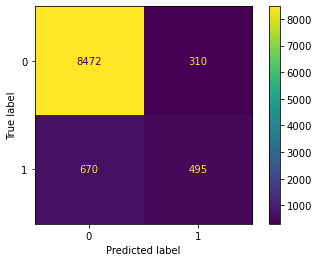

In [175]:
#setting oversampling strategy to 150% of minority class
oversample = RandomOverSampler(random_state=713, sampling_strategy={0:35140, 1:6968})
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train_preprocessed_normalized_with_acceptable_pvals, y_train)   
#adding the constant to X_train
X = sm.add_constant(X_train_over)
#instantiate & fit the model to X_over & y_over
logit_model = sm.Logit(y_train_over.astype(float), X.astype(float))
over_at_150_result = logit_model.fit(maxiter=3500)
#make predictions for our evaluation metrics
y_pred_test_over = round(over_at_150_result.predict(X_test_preprocessed_normalized_with_acceptable_pvals), 0).astype(int)
#building a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_over);

This 150%-oversampled StatsModels model:

- predicted true positives (bottom right) 495 times (5.0% of all predictions, the baseline was 3.9%)
- predicted false positives (top right) 310 times (3.1%, baseline was 2.1%)
- predicted true negatives (top left) 8,472 times (85.2%, baseline was 86.2%)
- predicted false negatives (bottom left) 670 times (6.7%, baseline was 7.9%)

Our optimized decision tree model (undersampling at 60% and max_depth=10):

- predicted true positives (bottom right) 820 times (8.2% of all predictions, the baseline had 4.8%)
- predicted false positives (top right) 698 times (7.0%, the baseline was 4.1%)
- predicted true negatives (top left) 8,084 times (81.3%, baseline was 84.2%)
- predicted false negatives (bottom left) 345 times (3.5%, baseline was 6.9%)

So, even though our best StatsModels Logit model results in fewer wasted call center calls (false positives), it also results in much fewer true positives, so this won't work for our ultimate final model. However, let's try Logistic Regression with Scikit-Learn before we make a final call.

## Logistic Regression model with Scikit-Learn


In [189]:
from sklearn.linear_model import LogisticRegression
#instantiate and fit the baseline model
logit_baseline_model = LogisticRegression(random_state=713, max_iter=2000)
logit_baseline_model.fit(X_train_preprocessed_normalized, y_train)

LogisticRegression(max_iter=2000, random_state=713)

In [190]:
#make predictions
y_pred_train_baseline = logit_baseline_model.predict(X_train_preprocessed_normalized)
y_pred_test_baseline = logit_baseline_model.predict(X_test_preprocessed_normalized)

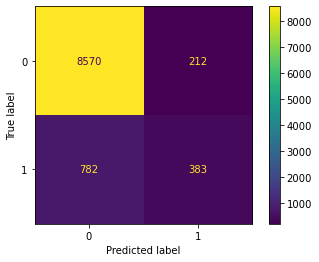

In [191]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_baseline);

This baseline Logistic Regression model:

- predicted true positives (bottom right) 383 times (3.9%, the decision tree baseline had 4.8%, the optimal one had 8.2%)
- predicted false positives (top right) 212 times (2.1%, the decision tree baseline was 4.1%, the optimal one had 7.0%)
- predicted true negatives (top left) 8,570 times (86.2%, the decision tree baseline was 84.2%, the optimal one had 81.3%)
- predicted false negatives (bottom left) 782 times (7.9%, the decision treebaseline was 6.9%, the optimal one had 3.5%)

While this Scikit-Learn Logit baseline is a mixed result in comparison to the decision tree baseline, it's pretty rough when compared to the optimized decision tree. Even if it's doing a substantially better job with the true negatives/false positives, our focus on recall doesn't prioritize that strength as much as identifying true positives and avoiding false negatives.

Let's see what we can do to try and balance this model out. First things first: let's run the evaluation metrics here as we did with our previous models:

In [192]:
recall_score(y_test, y_pred_test_baseline)

0.32875536480686696

Terrible, as we expected from our confusion matrix. What about AUC?

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_baseline)
print('test AUC:', auc(fpr, tpr))

test AUC: 0.6523075389281432


Not great, not terrible, but definitely needs improvement. 

In [194]:
#train
baseline_neg_log_loss_cv_train = cross_val_score(logit_baseline_model, 
                                                 X_train_preprocessed_normalized, 
                                                 y_train, 
                                                 scoring='neg_log_loss')
baseline_log_loss_train= -(baseline_neg_log_loss_cv_train.mean())
print('training log loss score:', baseline_log_loss_train)

#test
baseline_neg_log_loss_cv_test = cross_val_score(logit_baseline_model, 
                                                X_test_preprocessed_normalized, 
                                                y_test, 
                                                scoring='neg_log_loss')
baseline_log_loss_test = -(baseline_neg_log_loss_cv_test.mean())
print('testing log loss score:', baseline_log_loss_test)

training log loss score: 0.25275860454513277
testing log loss score: 0.25200182172503244


Ok, good to have a baseline. Now let's begin with the same steps we took for the decision tree and see whether under/over-sampling will help. When I started that process with decision trees, I just added a class_weight='balanced' hyperparam. I can do the same thing here, so let's try that first:

In [196]:
logit_baseline_model_balanced = LogisticRegression(random_state=713, class_weight="balanced", max_iter=2000)
logit_baseline_model_balanced.fit(X_train_preprocessed_normalized, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=713)

In [197]:
#make predictions
y_pred_train_balanced = logit_baseline_model_balanced.predict(X_train_preprocessed_normalized)
y_pred_test_balanced = logit_baseline_model_balanced.predict(X_test_preprocessed_normalized)

In [199]:
1424-698

726

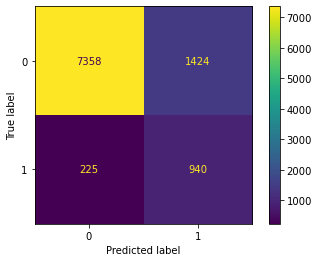

In [198]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_balanced);

This 'balanced' Logistic Regression model:

- predicted true positives (bottom right) 940 times (9.5%, our scikit-learn logit baseline had 3.9%, the optimal decision tree had 8.2%)
- predicted false positives (top right) 1,424 times (14.3%, logit baseline had 2.1%, optimal d.t. had 7.0%)
- predicted true negatives (top left) 7,358 times (74%, logit baseline had 86.2%, optimal d.t. had 81.3%)
- predicted false negatives (bottom left) 225 times (2.3%, logit baseline had 7.9%, optimal one had 3.5%)

On one hand, that is a terrible amount of false positives, but on the other hand, it's a great number of false negatives, which is more important for our stakeholder. 

Specifically, **this model boasts 120 fewer missed term deposits than our optimized decision tree model, but at the expense of 726 more unsuccesful calls.** Again, it would be up to the stakeholder to determine whether that's worth it since they have an idea of what each term deposit gains them as opposed to what each wasted call center call costs, but that seems like a *lot* of wasted money on the call center.

Hopefully, we can improve on this model further and reduce the number of false positives without sacrificing (too many) false negatives. First, however, let's run the remaining evaluation metrics.

In [200]:
recall_score(y_test, y_pred_test_balanced)

0.8068669527896996

Wow, what an improvement. Ok now AUC:

In [201]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_balanced)
print('test AUC:', auc(fpr, tpr))

test AUC: 0.8223585504098806


Gracious, that's the best AUC we've seen so far, but we know it's coming at the expense of false positives.

In [203]:
#train
baseline_neg_log_loss_cv_train = cross_val_score(logit_baseline_model_balanced, 
                                                 X_train_preprocessed_normalized, 
                                                 y_train, 
                                                 scoring='neg_log_loss')
baseline_log_loss_train= -(baseline_neg_log_loss_cv_train.mean())
print('training log loss score:', baseline_log_loss_train)

#test
baseline_neg_log_loss_cv_test = cross_val_score(logit_baseline_model_balanced, 
                                                X_test_preprocessed_normalized, 
                                                y_test, 
                                                scoring='neg_log_loss')
baseline_log_loss_test = -(baseline_neg_log_loss_cv_test.mean())
print('testing log loss score:', baseline_log_loss_test)

training log loss score: 0.44726509889449967
testing log loss score: 0.4377496907561745


The log_loss error almost doubled; not a good sign. Next, let's try under & over-sampled inputs on the baseline model as opposed to the class_weight='balanced' parameter.  

In [205]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=713)
# fit and apply the transform
X_train_preprocessed_normalized_over, y_train_over = oversample.fit_resample(X_train_preprocessed_normalized, y_train)
#instantiate and fit
logit_baseline_oversample_minority = LogisticRegression(random_state=713, max_iter=2000)
logit_baseline_oversample_minority.fit(X_train_preprocessed_normalized_over, y_train_over)

LogisticRegression(max_iter=2000, random_state=713)

In [206]:
#make predictions
y_pred_train_oversample_minority = logit_baseline_oversample_minority.predict(X_train_preprocessed_normalized_over)
y_pred_test_oversample_minority = logit_baseline_oversample_minority.predict(X_test_preprocessed_normalized)

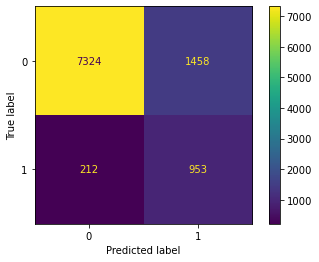

In [207]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_oversample_minority);

We can already see we have the same issue with the class_weight='balanced' model, so let's try a more gradual approach to oversampling:

In [208]:
#over-sampling strategies representing an over-sampling of the minority class ("1") at levels of 
# 150%, 140%, 130%, 120%, and 110%, respectively.
sampling_strategies = [{0:35140, 1:6968}, {0:35140, 1:6503}, {0:35140, 1:6039}, {0:35140, 1:5574}, {0:35140, 1:5156}]

In [209]:
recall_scores = []
auc_scores = []

sampling_strategies = sampling_strategies
for i in sampling_strategies:
    # define oversampling strategy
    oversample = RandomOverSampler(random_state=713, sampling_strategy=i)
    # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_preprocessed_normalized, y_train)   
    #instantiate & fit the model to X_over & y_over
    temp_logit_oversample = LogisticRegression(random_state=713, max_iter=2000)
    temp_logit_oversample.fit(X_train_over, y_train_over)
        
    #make predictions for our evaluation metrics
    y_pred_test_over = temp_logit_oversample.predict(X_test_preprocessed_normalized)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test_over))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for 1.5 down through 1.1 sample_strategy dictionaries:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Recall & AUC scores for 1.5 down through 1.1 sample_strategy dictionaries:
recall scores: [0.41630901287553645, 0.40772532188841204, 0.3888412017167382, 0.36909871244635195, 0.351931330472103]
auc_scores:    [0.6908463761713142, 0.6879209620145773, 0.6790482483190842, 0.6702587618255444, 0.6626998943410389]


In [210]:
print('maximum recall score:', max(recall_scores))
print('maximum AUC score:', max(auc_scores))

maximum recall score: 0.41630901287553645
maximum AUC score: 0.6908463761713142


Each recall and AUC score above are an improvement over the baseline, which you love to see. It looks like the best overall performance comes when oversampling is set as high as it can legitimately go at 150%. Let's isolate it and run a confusion matrix:

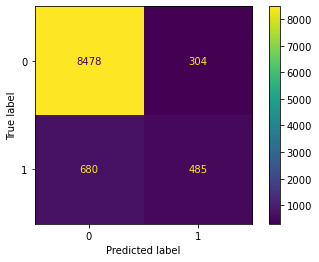

In [211]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy={0:35140, 1:6968}, random_state=713)
# fit and apply the transform
X_train_preprocessed_normalized_over, y_train_over = oversample.fit_resample(X_train_preprocessed_normalized, y_train)
#instantiate and fit
logit_oversample_150 = LogisticRegression(random_state=713, max_iter=2000)
logit_oversample_150.fit(X_train_preprocessed_normalized_over, y_train_over)
#make predictions
y_pred_test_oversample_150 = logit_oversample_150.predict(X_test_preprocessed_normalized)
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_oversample_150);

This oversampled-at-150% Logistic Regression model:

- predicted true positives (bottom right) 485 times (4.9%, our logit baseline had 3.9%, the optimal decision tree had 8.2%)
- predicted false positives (top right) 304 times (3.1%, logit baseline had 2.1%, optimal d.t. had 7.0%)
- predicted true negatives (top left) 8,478 times (85.2%, logit baseline had 86.2%, optimal d.t. had 81.3%)
- predicted false negatives (bottom left) 680 times (6.8%, logit baseline had 7.9%, optimal one had 3.5%)

This is a substantial improvement over our baseline, but it's still pretty rough compared to our optimized decision tree. Let's see whether undersampling helps more:

In [213]:
#These represent undersampling of the majority class ("0") at 90%, 80%, 70%, 60%, and then 50% of its
# original records, respectively.
sampling_strategies = [{0:31626, 1:4645}, {0:28112, 1:4645}, {0:24598, 1:4645}, {0:21084, 1:4645}, {0:17570, 1:4645}]

In [214]:
recall_scores = []
auc_scores = []

sampling_strategies = sampling_strategies
for i in sampling_strategies:
    # define undersampling strategy
    undersample = RandomUnderSampler(random_state=713, sampling_strategy=i)
    # fit and apply the transform
    X_train_under, y_train_under = undersample.fit_resample(X_train_preprocessed_normalized, y_train)   
    #instantiate & fit the model to X_under & y_under
    temp_logit_undersample = LogisticRegression(random_state=713, max_iter=2000)
    temp_logit_undersample.fit(X_train_under, y_train_under)
        
    #make predictions for our evaluation metrics
    y_pred_test_under = temp_logit_undersample.predict(X_test_preprocessed_normalized)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test_under))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_under)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for 0.9 through 0.5 sample_strategy undersampling dictionaries:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Recall & AUC scores for 0.9 through 0.5 sample_strategy undersampling dictionaries:
recall scores: [0.35708154506437767, 0.3811158798283262, 0.40858369098712444, 0.44206008583690987, 0.4832618025751073]
auc_scores:    [0.6651611323591075, 0.6756979991261877, 0.6878946694516583, 0.7017292002857972, 0.7184585032005576]


In [215]:
print('max recall score:', max(recall_scores))
print('max AUC score:', max(auc_scores))

max recall score: 0.4832618025751073
max AUC score: 0.7184585032005576


Undersampling at 150% has led to the highest-yet recall & AUC score with this Scikit-Learn Logit process. Let's isolate it and evaluate it further:

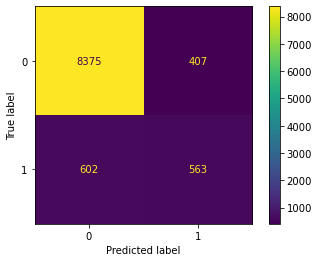

In [216]:
# setting undersampling to 50%
undersample = RandomUnderSampler(sampling_strategy={0:17570, 1:4645}, random_state=713)
# fit and apply the transform
X_train_preprocessed_normalized_under, y_train_under = undersample.fit_resample(X_train_preprocessed_normalized, y_train)
#instantiate and fit
logit_undersample_50 = LogisticRegression(random_state=713, max_iter=2000)
logit_undersample_50.fit(X_train_preprocessed_normalized_under, y_train_under)
#make predictions
y_pred_test_undersample_50 = logit_undersample_50.predict(X_test_preprocessed_normalized)
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_undersample_50);

This undersampled-at-50% Logistic Regression model:

- predicted true positives (bottom right) 563 times (5.7%, our logit baseline had 3.9%, the optimal decision tree had 8.2%)
- predicted false positives (top right) 407 times (4.1%, logit baseline had 2.1%, optimal d.t. had 7.0%)
- predicted true negatives (top left) 8,375 times (84.2%, logit baseline had 86.2%, optimal d.t. had 81.3%)
- predicted false negatives (bottom left) 602 times (6.1%, logit baseline had 7.9%, optimal one had 3.5%)

Similar story to what we just saw: better than the baseline, but nowhere near our optimized decision tree. Let's try both under and oversampling:

recall score with over-and-under sampling: 0.5819742489270386
AUC score with SMOTE: 0.7554029750670265


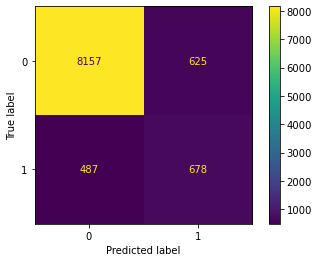

In [219]:
# setting undersampling to 50% and oversampling to 150%
undersample = RandomUnderSampler(sampling_strategy={0:17570, 1:4645}, random_state=713)
#adjusting oversampler to have as many majority records (class "0") as the undersampled
# set above will have
oversample = RandomOverSampler(sampling_strategy={0:17570, 1:6968}, random_state=713)
# fit and apply the transforms
X_train_over_and_under, y_train_over_and_under = undersample.fit_resample(X_train_preprocessed_normalized, y_train)
X_train_over_and_under, y_train_over_and_under = oversample.fit_resample(X_train_over_and_under, y_train_over_and_under)
#instantiate and fit the model
logit_over_and_under = LogisticRegression(random_state=713, max_iter=2000)
logit_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)
#make predictions
y_pred_test_over_and_under = logit_over_and_under.predict(X_test_preprocessed_normalized)
#recall score
print('recall score with over-and-under sampling:', recall_score(y_test, y_pred_test_over_and_under))
#auc score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_over_and_under)
print('AUC score with SMOTE:', auc(fpr, tpr))
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_over_and_under);

This undersampled-at-50%-and-oversampled-at-150% Logistic Regression model:

- predicted true positives (bottom right) 678 times (6.8%, our logit baseline had 3.9%, the optimal decision tree had 8.2%)
- predicted false positives (top right) 625 times (6.3%, logit baseline had 2.1%, optimal d.t. had 7.0%)
- predicted true negatives (top left) 8,157 times (82%, logit baseline had 86.2%, optimal d.t. had 81.3%)
- predicted false negatives (bottom left) 487 times (4.9%, logit baseline had 7.9%, optimal d.t. had 3.5%)

Better than over & undersampling on their own. Is this as good as SMOTE?

recall score with SMOTE: 0.792274678111588
AUC score with SMOTE: 0.8181938182177162


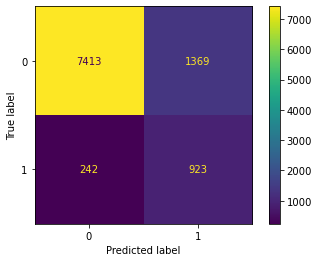

In [221]:
#instantiate and fit SMOTE
smote = SMOTE(random_state=713)
X_train_preprocessed_normalized_smote, y_train_smote = smote.fit_resample(X_train_preprocessed_normalized, y_train)
#instantiate and fit Logit model
logit_smote = LogisticRegression(random_state=713, max_iter=2000)
logit_smote.fit(X_train_preprocessed_normalized_smote, y_train_smote)
#transform X_test so we can make predictions
y_pred_test_smote = logit_smote.predict(X_test_preprocessed_normalized)
#recall score
print('recall score with SMOTE:', recall_score(y_test, y_pred_test_smote))
#auc score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_smote)
print('AUC score with SMOTE:', auc(fpr, tpr))
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_smote);

Nope, the false positives are out of control again. This means the Logit model with over-and-under-sampling is best Logit so far, let's tune a few hyperparameters with that model:

In [229]:
1e5

100000.0

In [230]:
C_params = [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14]

In [237]:
recall_scores = []
auc_scores = []

for i in C_params:
    #instantiate & fit the model to X_under & y_under
    temp_logit_over_and_under = LogisticRegression(random_state=713, max_iter=3000, C=i)
    temp_logit_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)
        
    #make predictions for our evaluation metrics
    y_pred_test = temp_logit_over_and_under.predict(X_test_preprocessed_normalized)
    #find & append recall scores
    recall_scores.append(recall_score(y_test, y_pred_test))
    #find & append auc scores
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    auc_scores.append(auc(fpr, tpr))

print("Recall & AUC scores for Logit model C params 1 through 1e14:")
print("recall scores:", recall_scores)
print("auc_scores:   ", auc_scores)

Recall & AUC scores for Logit model C params 1 through 1e14:
recall scores: [0.5819742489270386, 0.5862660944206008, 0.5939914163090129, 0.590557939914163, 0.5871244635193134, 0.5896995708154507, 0.5896995708154507, 0.5879828326180258, 0.590557939914163, 0.592274678111588, 0.5896995708154507, 0.5896995708154507, 0.5862660944206008, 0.5879828326180258, 0.5914163090128756]
auc_scores:    [0.7554029750670265, 0.7574350285357387, 0.7612407548409104, 0.7599225591167261, 0.7579780823631639, 0.7586962896208886, 0.7598349824015764, 0.7583503322734856, 0.7599225591167261, 0.7610086667715763, 0.7588101588989574, 0.7590948320941293, 0.7573211592576701, 0.7581225937173481, 0.7601809397489793]


In [238]:
print('max recall score:', max(recall_scores))
print('max AUC score:', max(auc_scores))

max recall score: 0.5939914163090129
max AUC score: 0.7612407548409104


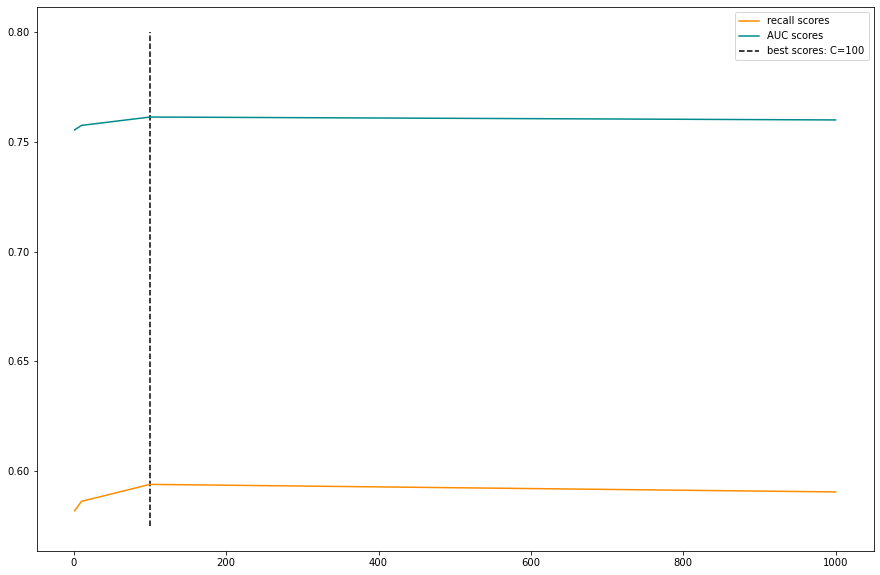

In [243]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(C_params[0:4], recall_scores[0:4], color="darkorange", label="recall scores")
ax.plot(C_params[0:4], auc_scores[0:4], color="darkcyan", label="AUC scores")
ax.vlines(100, ymin=0.575, ymax=0.8, color='k', linestyle='--', label="best scores: C=100")
plt.legend();

So when C=100, we get the maximum recall score of 0.59399 *and* maximum AUC score of 0.76124, which are both slight improvements, so we can proceed knowing we'll set C=100 from here on out. What about the regulator itself and the solver?

In [244]:
print("solver:", logit_over_and_under.get_params()["solver"])
print("penalty:", logit_over_and_under.get_params()["penalty"])

solver: lbfgs
penalty: l2
